In [1]:
import nltk

/opt/conda/lib/python3.6/site-packages/sklearn/externals/_arff.py:204: DeprecationWarning: Flags not at the start of the expression '(?x)\n        ,      ' (truncated)
  ''' % {'value_re': value_re})
/opt/conda/lib/python3.6/site-packages/sklearn/externals/_arff.py:204: DeprecationWarning: Flags not at the start of the expression '(?x)\n        ,      ' (truncated)
  ''' % {'value_re': value_re})
/opt/conda/lib/python3.6/site-packages/sklearn/externals/_arff.py:204: DeprecationWarning: Flags not at the start of the expression '(?x)\n        ,      ' (truncated)
  ''' % {'value_re': value_re})
/opt/conda/lib/python3.6/site-packages/sklearn/externals/_arff.py:219: DeprecationWarning: Flags not at the start of the expression '(?x)\n        (?:^\\s*' (truncated)
  ''' % {'value_re': value_re})
/opt/conda/lib/python3.6/site-packages/sklearn/externals/_arff.py:219: DeprecationWarning: Flags not at the start of the expression '(?x)\n        (?:^\\s*' (truncated)
  ''' % {'value_re': value_re}

In [2]:
#nltk.download_shell()

In [18]:
messages= [line.rstrip()for line in open('../input/spam.csv',encoding = "ISO-8859-1")]

In [5]:
print(len(messages))

5575


In [22]:
messages[0]      

'v1,v2,,,'

In [19]:
for message_no, message in enumerate(messages[1:11]):
    print(message_no,message)
    print('\n')

0 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,


1 ham,Ok lar... Joking wif u oni...,,,


2 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,


3 ham,U dun say so early hor... U c already then say...,,,


4 ham,"Nah I don't think he goes to usf, he lives around here though",,,


5 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


6 ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,


7 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,


8 spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To cla

In [23]:
import pandas as pd

In [40]:
col=['v1','v2']
messages= pd.read_csv('../input/spam.csv', encoding = "ISO-8859-1", usecols=col)
messages.columns=['label', 'message']

In [41]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
messages.groupby('label').describe()

message ...      
        count ...  freq
label         ...      
ham      4825 ...    30
spam      747 ...     4

[2 rows x 4 columns]

In [44]:
messages['length']=messages['message'].apply(len)

In [45]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

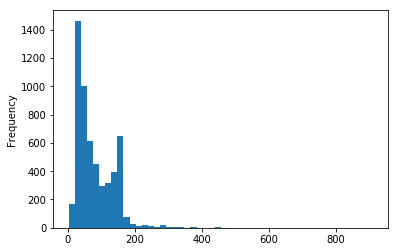

In [49]:
messages['length'].plot.hist(bins=50)

In [50]:
messages['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [54]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1043f755f8>,
      dtype=object)

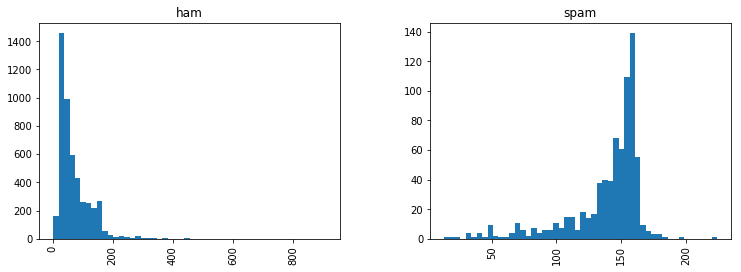

In [55]:
messages.hist(column='length', by= 'label', bins=50, figsize=(12,4))

## Preprocessing

In [66]:
import string
from nltk.corpus import stopwords

In [67]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    """
    nopunc= [char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Pipeline & Model

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [80]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [83]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [84]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f1043d88158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [85]:
predictions= pipeline.predict(msg_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1421
        spam       1.00      0.69      0.82       251

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672

